In [1]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
import pandas as pd
from omegaconf import OmegaConf
from pathlib import Path
from pprint import pprint
from torch.utils import data

# mycode
from ml_utilities.output_loader.result_loader import SweepResult, JobResult

from tflearning.learning_dynamics.covariance_analysis import GradCovarianceAnalyzer

# Gradient covariance analysis

I use this notebook to implement the gradient covariance analysis. 

In [2]:
# Load a job result to perform analysis on
spec = 'cf10-resnet'
path = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/IA-A-cifar10-17.2.1-resnet-B--230120_134950'
jobr = JobResult(path)
jobr

JobResult(/system/user/publicwork/beck/projects/regularization/tflearning/outputs/IA-A-cifar10-17.2.1-resnet-B--230120_134950)

In [3]:
len(jobr.available_model_checkpoint_indices), #jobr.available_model_checkpoint_indices, 

(28,)

In [6]:
grad_analyzer = GradCovarianceAnalyzer(job=jobr, checkpoint_idxs=[], num_batches=[25], device='cuda:0', save_to_disk=True, batch_sizes=[128], save_folder_suffix='2')

Files already downloaded and verified


In [7]:
# stats, eigvals = grad_analyzer._covariance_analysis_for_batchsize_and_numbatches(batch_size=128, num_batch=15, dataloaders=grad_analyzer._create_dataloaders(128))

In [8]:
stats, eigvals = grad_analyzer.covariance_analysis()

cov analysis at checkpoint 64001: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]


In [9]:
stats

dataset                                    train                      \
spectral_statistic                    max_eigval min_non_zero_eigval   
batch_size num_batches checkpoint_idx                                  
128        25          0                0.155382            0.000719   
                       50               1.073768            0.012504   
                       100              0.686637            0.015608   
                       250              2.136121            0.025737   
                       500              1.296436            0.028753   
                       1000             2.568811            0.041025   
                       2000             1.708611            0.040732   
                       4000             0.528284            0.029120   
                       5000             1.040853            0.048320   
                       8000             1.453310            0.048457   
                       10000            1.347305            0.062505   
                       12000            0.470556            0.029270   
                       15000            0.565061            0.033348   
                       16000            0.646033            0.044080   
                       20000            1.246245            0.043436   
                       24000            0.508361            0.033574   
                       28000            0.569574            0.041891   
                       32000            0.499191            0.030538   
                       36000            0.158515            0.004038   
                       40000            0.156755            0.001059   
                       44000            0.156162            0.002269   
                       44500            0.143688            0.000420   
                       48000            0.227942            0.000719   
                       52000            0.126374            0.000897   
                       56000            0.126925            0.000506   
                       60000            0.141386            0.000524   
                       64000            0.155684            0.000435   
                       64001            0.143688            0.000420   

dataset                                                                    \
spectral_statistic                    inverse_condition_number      erank   
batch_size num_batches checkpoint_idx                                       
128        25          0                              0.004626   8.874350   
                       50                             0.011645   9.434126   
                       100                            0.022731  12.231400   
                       250                            0.012048   9.413007   
                       500                            0.022179  11.243946   
                       1000                           0.015970   9.868843   
                       2000                           0.023839  12.086455   
                       4000                           0.055121  15.570558   
                       5000                           0.046423  14.521061   
                       8000                           0.033343  13.647442   
                       10000                          0.046392  15.538687   
                       12000                          0.062203  17.385597   
                       15000                          0.059017  16.858055   
                       16000                          0.068231  17.542723   
                       20000                          0.034853  14.755312   
                       24000                          0.066044  17.419142   
                       28000                          0.073547  17.589060   
                       32000                          0.061176  17.442530   
                       36000                          0.025475  16.965919   
                       40000                          0.006757  16.044098

In [43]:
from tflearning.learning_dynamics.plot import plot_covariance_statistics

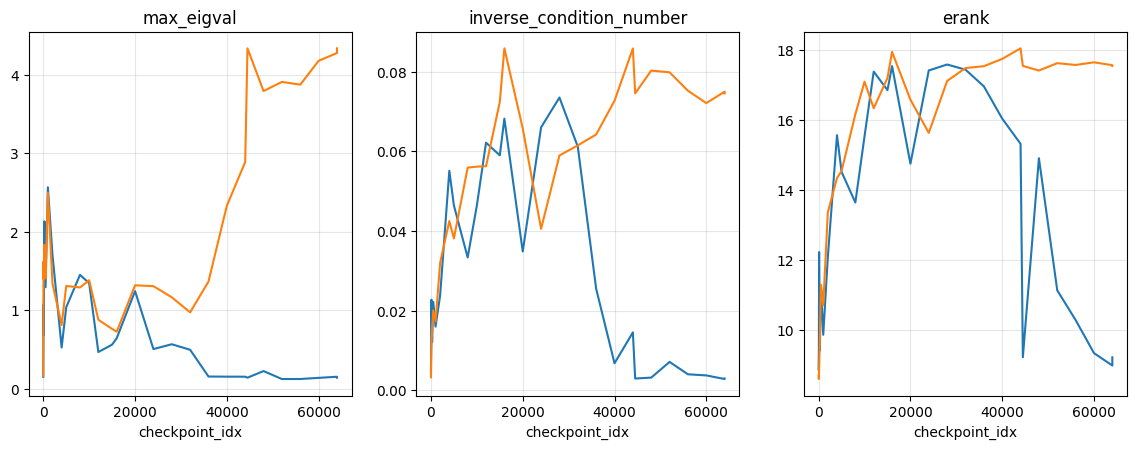

In [44]:
f = plot_covariance_statistics(stats)

In [17]:
plot_df = stats
statistic_names = ['max_eigval', 'inverse_condition_number', 'erank']

In [18]:
plot_df_ref = plot_df.swaplevel(0,1, axis=1).sort_index(axis=1, level=0)
plot_df_ref

spectral_statistic                         erank             \
dataset                                    train        val   
batch_size num_batches checkpoint_idx                         
128        25          0                8.874350   8.695687   
                       50               9.434126   8.604740   
                       100             12.231400   8.892610   
                       250              9.413007   9.618441   
                       500             11.243946  11.300537   
                       1000             9.868843  10.716493   
                       2000            12.086455  13.365945   
                       4000            15.570558  14.343943   
                       5000            14.521061  14.548964   
                       8000            13.647442  16.167929   
                       10000           15.538687  17.099489   
                       12000           17.385597  16.339537   
                       15000           16.858055  17.204943   
                       16000           17.542723  17.950031   
                       20000           14.755312  16.584711   
                       24000           17.419142  15.637259   
                       28000           17.589060  17.120201   
                       32000           17.442530  17.487852   
                       36000           16.965919  17.540796   
                       40000           16.044098  17.749308   
                       44000           15.323773  18.051043   
                       44500            9.225910  17.549383   
                       48000           14.913115  17.416750   
                       52000           11.137296  17.627335   
                       56000           10.290205  17.575907   
                       60000            9.345672  17.651764   
                       64000            8.991130  17.570190   
                       64001            9.225913  17.549391   

spectral_statistic                    inverse_condition_number            \
dataset                                                  train       val   
batch_size num_batches checkpoint_idx                                      
128        25          0                              0.004626  0.003235   
                       50                             0.011645  0.007978   
                       100                            0.022731  0.010572   
                       250                            0.012048  0.015288   
                       500                            0.022179  0.020044   
                       1000                           0.015970  0.017247   
                       2000                           0.023839  0.032036   
                       4000                           0.055121  0.042512   
                       5000                           0.046423  0.038136   
                       8000                           0.033343  0.055933   
                       10000                          0.046392  0.056172   
                       12000                          0.062203  0.056286   
                       15000                          0.059017  0.072417   
                       16000                          0.068231  0.085908   
                       20000                          0.034853  0.065773   
                       24000                          0.066044  0.040552   
                       28000                          0.073547  0.058982   
                       32000                          0.061176  0.061520   
                       36000                          0.025475  0.064260   
                       40000                          0.006757  0.072724   
                       44000                          0.014529  0.085881   
                       44500                          0.002924  0.074582   
                       48000                          0.003155  0.080321   
                       52000                          0.007101  0.0798

In [21]:
list(plot_df_ref.columns.get_level_values('dataset').unique())

['train', 'val']

In [27]:
for ind, df in plot_df_ref.groupby(level=[0,1]):
    break

In [30]:
ind

(128, 25)

In [42]:
df.droplevel(level=[0,1])['erank']['train'].values

array([ 8.87434959,  9.4341259 , 12.23139954,  9.41300678, 11.24394608,
        9.86884308, 12.08645535, 15.57055759, 14.52106094, 13.64744186,
       15.53868675, 17.38559723, 16.85805511, 17.5427227 , 14.75531197,
       17.41914177, 17.58905983, 17.44252968, 16.96591949, 16.0440979 ,
       15.32377338,  9.22591019, 14.91311455, 11.13729572, 10.290205  ,
        9.34567165,  8.99112988,  9.22591305])

In [24]:
plot_df_ref.loc[128, 25]

spectral_statistic      erank            inverse_condition_number            \
dataset                 train        val                    train       val   
checkpoint_idx                                                                
0                    8.874350   8.695687                 0.004626  0.003235   
50                   9.434126   8.604740                 0.011645  0.007978   
100                 12.231400   8.892610                 0.022731  0.010572   
250                  9.413007   9.618441                 0.012048  0.015288   
500                 11.243946  11.300537                 0.022179  0.020044   
1000                 9.868843  10.716493                 0.015970  0.017247   
2000                12.086455  13.365945                 0.023839  0.032036   
4000                15.570558  14.343943                 0.055121  0.042512   
5000                14.521061  14.548964                 0.046423  0.038136   
8000                13.647442  16.167929                 0.033343  0.055933   
10000               15.538687  17.099489                 0.046392  0.056172   
12000               17.385597  16.339537                 0.062203  0.056286   
15000               16.858055  17.204943                 0.059017  0.072417   
16000               17.542723  17.950031                 0.068231  0.085908   
20000               14.755312  16.584711                 0.034853  0.065773   
24000               17.419142  15.637259                 0.066044  0.040552   
28000               17.589060  17.120201                 0.073547  0.058982   
32000               17.442530  17.487852                 0.061176  0.061520   
36000               16.965919  17.540796                 0.025475  0.064260   
40000               16.044098  17.749308                 0.006757  0.072724   
44000               15.323773  18.051043                 0.014529  0.085881   
44500                9.225910  17.549383                 0.002924  0.074582   
48000               14.913115  17.416750                 0.003155  0.080321   
52000               11.137296  17.627335                 0.007101  0.079882   
56000               10.290205  17.575907                 0.003985  0.075257   
60000                9.345672  17.651764                 0.003706  0.072140   
64000                8.991130  17.570190                 0.002793  0.075013   
64001                9.225913  17.549391                 0.002924  0.074583   

spectral_statistic max_eigval           min_non_zero_eigval            
dataset                 train       val               train       val  
checkpoint_idx                                                         
0                    0.155382  0.166278            0.000719  0.000538  
50                   1.073768  1.625331            0.012504  0.012967  
100                  0.686637  1.398045            0.015608  0.014780  
250                  2.136121  1.835185            0.025737  0.028056  
500                  1.296436  1.409403            0.028753  0.028250  
1000                 2.568811  2.499452            0.041025  0.043109  
2000                 1.708611  1.345336            0.040732  0.043099  
4000                 0.528284  0.814362            0.029120  0.034620  
5000                 1.040853  1.311946            0.048320  0.050032  
8000                 1.453310  1.292808            0.048457  0.072310  
10000                1.347305  1.384790            0.062505  0.077787  
12000                0.470556  0.881875            0.029270  0.049637  
15000                0.565061  0.764760            0.033348  0.055382  
16000                0.646033  0.729189            0.044080  0.062643  
20000                1.246245  1.320542            0.043436  0.086856  
24000                0.508361  1.309334            0.033574  0.053097  
28000                0.569574  1.167498            0.041891  0.068861  
32000                0.499191  0.976149            0.030538  0.060052  
36000                0.158515  1.36788

In [14]:
eigvals.style

In [20]:
import copy
# create datasets, set train transforms to val transforms if any
data_cfg = copy.deepcopy(jobr.config.config.data)
val_split_transforms = data_cfg.get('val_split_transforms', {})
data_cfg.train_split_transforms = val_split_transforms
data_cfg

{'dataset': 'cifar10', 'dataset_kwargs': {'data_root_path': '/system/user/beck/pwbeck/data'}, 'dataset_split': {'train_val_split': 0.9}, 'train_split_transforms': {}}

In [26]:
from ml_utilities.data.datasetgenerator import DatasetGenerator
from ml_utilities.data.data_utils import show_images

dataset_gen = DatasetGenerator(**data_cfg)
dataset_gen.generate_dataset()

Files already downloaded and verified


In [30]:
train_loader = data.DataLoader(dataset_gen.train_split, batch_size=10, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


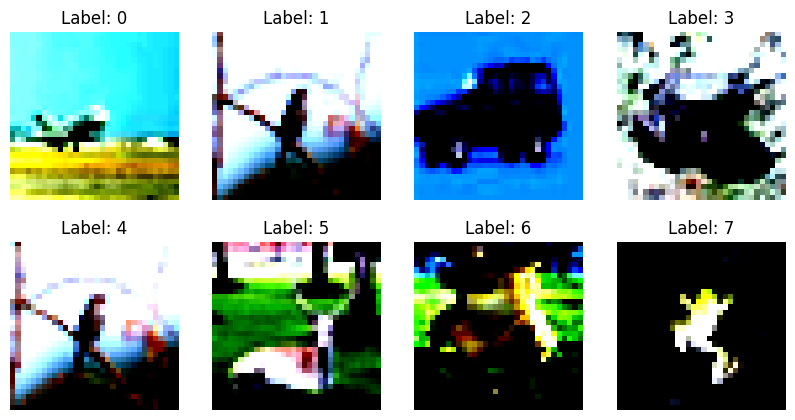

In [31]:
for i, (inputs, targets) in enumerate(train_loader):
    show_images(inputs, num_images=10, shuffle=False)
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


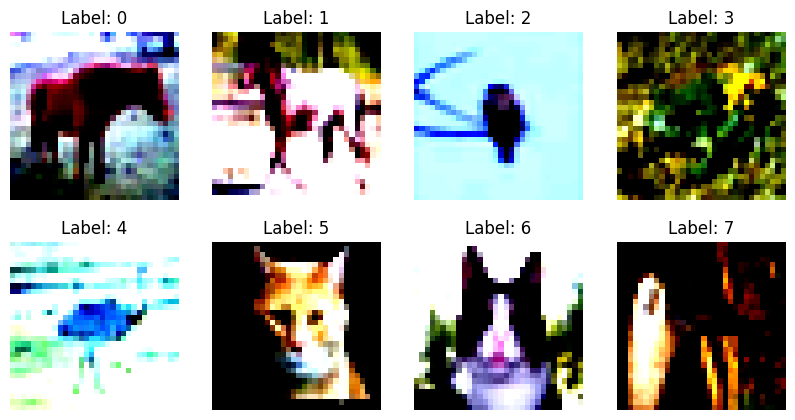

In [32]:
for i, (inputs, targets) in enumerate(train_loader):
    show_images(inputs, num_images=10, shuffle=False)
    break